In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.io_utils import HDF5Matrix
%matplotlib inline

Using TensorFlow backend.


In [3]:
# Open the file as readonly
h5f = h5py.File(r'/content/drive/My Drive/43.ExtLab02Jun2019/SVHN_single_grey1.h5', 'r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

X_train = X_train.reshape(X_train.shape[0], 32, 32, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1).astype('float32')
X_val = X_val.reshape(X_val.shape[0], 32, 32, 1).astype('float32')

# Close this file
h5f.close()

print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (42000, 32, 32, 1) (42000,)
Validation set (60000, 32, 32, 1) (60000,)
Test set (18000, 32, 32, 1) (18000,)


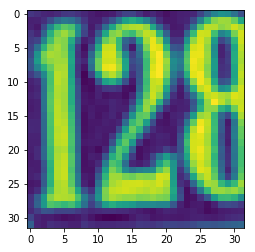

2


In [4]:
plt.imshow(np.squeeze(X_train[0])) #see 5th image
plt.show()
print(y_train[0])

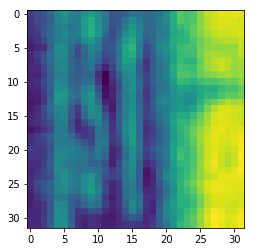

1


In [5]:
plt.imshow(np.squeeze(X_test[0])) #see 5th image
plt.show()
print(y_test[0])

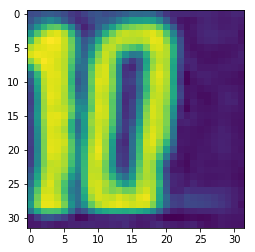

0


In [6]:
plt.imshow(np.squeeze(X_val[0])) #see 5th image
plt.show()
print(y_val[0])

In [0]:
import cv2
def image_to_feature_vector(image, size=(32, 32)):
    # resize the image to a fixed size, then flatten the image into
    # a list of raw pixel intensities
    return cv2.resize(image, size).flatten()

In [8]:
rawImages_train = []
# loop over the input images
for (i, imagePath) in enumerate(X_train):
    pixels = image_to_feature_vector(X_train[i])
    rawImages_train.append(pixels)
rawImages_train = np.array(rawImages_train)
rawImages_train.shape

(42000, 1024)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
neighbours = np.arange(30,40,1)
param_grid = {'n_neighbors': neighbours}
NNH = KNeighborsClassifier(weights = 'uniform', algorithm = 'brute')
gs = GridSearchCV(NNH,param_grid,cv=10,scoring='accuracy',n_jobs=-1,verbose=1)
gs.fit(rawImages_train,y_train)
print('Best Param : ',gs.best_params_,'accuracy : ',gs.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  9.9min


Best Param :  {'n_neighbors': 39} accuracy :  0.5258571428571429


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 21.4min finished


In [10]:
rawImages_test = []
# loop over the input images
for (i, imagePath) in enumerate(X_test):
    pixels = image_to_feature_vector(X_test[i])
    rawImages_test.append(pixels)
rawImages_test = np.array(rawImages_test)
rawImages_test.shape

(18000, 1024)

In [11]:
#Accuracy on Test Data
NNH = KNeighborsClassifier(n_neighbors = 39, weights = 'uniform', algorithm = 'brute')
NNH.fit(rawImages_train, y_train)
print(NNH.score(rawImages_test, y_test))

0.5372222222222223


In [14]:
#Confusion Matrix Train Data
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, NNH.predict(rawImages_train)))

[[3145  131   49   71  120   77  181   60  113  239]
 [ 229 3208   85  125  146   54   78  127   51   69]
 [ 211  444 2518  177  119   68   89  303  115  153]
 [ 237  600  212 2236  131  303   77  156  190  139]
 [ 232  529   84  100 2888   60   87   41   65  102]
 [ 353  392   90  464  122 2083  255   79  217  177]
 [ 665  291   70  147  281  223 1969   57  352  113]
 [ 198  467  214  151   59   61   79 2811   65   87]
 [ 541  292  123  217  217  238  387   77 1897  199]
 [ 666  336  127  145  125  176  110  116  225 2170]]


In [15]:
#Confusion Matrix Test Data
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, NNH.predict(rawImages_test)))

[[1272   68   31   47   45   38   84   36   74  119]
 [ 106 1359   47   76   73   24   37   57   23   26]
 [ 100  228  959   94   51   36   31  170   47   87]
 [ 111  272   96  748   52  166   36   64   98   76]
 [ 107  266   27   56 1178   18   46   25   34   55]
 [ 158  167   45  225   70  726  142   38  113   84]
 [ 318  119   25   57  150  116  777   21  195   54]
 [  96  209  112   67   37   34   43 1138   22   50]
 [ 258  124   61  104  103  102  234   25  678  123]
 [ 289  153   45   73   75   84   57   80  113  835]]


In [16]:
#Accuracy & Confusion Matrix Validation Data
rawImages_val = []
# loop over the input images
for (i, imagePath) in enumerate(X_val):
    pixels = image_to_feature_vector(X_val[i])
    rawImages_val.append(pixels)
rawImages_val = np.array(rawImages_val)
print(rawImages_val.shape)
print(NNH.score(rawImages_val, y_val))
print(confusion_matrix(y_val, NNH.predict(rawImages_val)))

(60000, 1024)
0.5765833333333333
[[4417  199   80  118  165  115  265   96  187  358]
 [ 335 4567  132  201  219   78  115  184   74   95]
 [ 311  672 3477  271  170  104  120  473  162  240]
 [ 348  872  308 2984  183  469  113  220  288  215]
 [ 339  795  111  156 4066   78  133   66   99  157]
 [ 511  559  135  689  192 2809  397  117  330  261]
 [ 983  410   95  204  431  339 2746   78  547  167]
 [ 294  676  326  218   96   95  122 3949   87  137]
 [ 799  416  184  321  320  340  621  102 2575  322]
 [ 955  489  172  218  200  260  167  196  338 3005]]


In [0]:
import keras
from keras.utils import np_utils
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)
y_val_cat = keras.utils.to_categorical(y_val, 10)

In [0]:
#CNN Model for SVHN Single Digit Classification
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras import optimizers

BATCH_SIZE = 32
EPOCH = 50
# neural network model
model = Sequential()
model.add(Convolution2D(128, (5,5), input_shape = (32, 32, 1), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Convolution2D(64, (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Convolution2D(32, (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
              #optimizer = optimizers.SGD(lr=0.0001, momentum=0.9),
              optimizer ='adam',
              metrics = ['accuracy'])

In [19]:
# Train the model
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=1, mode='auto')
checkpoint = ModelCheckpoint("cnn1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.fit(X_train, y_train_cat, nb_epoch=EPOCH, batch_size=BATCH_SIZE,
          validation_data=(X_test, y_test_cat), verbose=True, callbacks = [early, checkpoint])

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 16s 373us/step - loss: 1.8286 - acc: 0.3338 - val_loss: 0.9419 - val_acc: 0.7239

Epoch 00001: val_acc improved from -inf to 0.72389, saving model to cnn1.h5
Epoch 2/50
42000/42000 [==============================] - 12s 279us/step - loss: 0.9578 - acc: 0.6999 - val_loss: 0.6218 - val_acc: 0.8184

Epoch 00002: val_acc improved from 0.72389 to 0.81839, saving model to cnn1.h5
Epoch 3/50
42000/42000 [==============================] - 12s 275us/step - loss: 0.7255 - acc: 0.7882 - val_loss: 0.4836 - val_acc: 0.8559

Epoch 00003: val_acc improved from 0.81839 to 0.85589, saving model to cnn1.h5
Epoch 4/50
42000/42000 [==============================] - 12s 286us/step - loss: 0.6282 - acc: 0.8194 - val_loss: 0.4624 - val_acc: 0.8684

Epoch 00004: val_acc improved from 0.85589 to 0.86839, saving model to cnn1.h5
Epoch 5/50
42000/42000 [==============================] - 12s 289us/step - lo

In [0]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=False,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0,  # randomly shift images vertically (fraction of total height)
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

In [29]:
print(X_train.shape)
datagen.fit(X_train)

(42000, 32, 32, 1)


In [30]:
checkpoint1 = ModelCheckpoint("cnn2.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.fit_generator(datagen.flow(X_train, y_train_cat, batch_size=BATCH_SIZE), 
                    steps_per_epoch=X_train.shape[0]/BATCH_SIZE, epochs=EPOCH, 
                    validation_data=(X_test, y_test_cat), callbacks = [early, checkpoint1])

Epoch 1/50
1313/1312 [==============================] - 18s 14ms/step - loss: 0.6620 - acc: 0.8150 - val_loss: 0.3805 - val_acc: 0.8893

Epoch 00001: val_acc improved from -inf to 0.88933, saving model to cnn2.h5
Epoch 2/50
1313/1312 [==============================] - 19s 14ms/step - loss: 0.6352 - acc: 0.8215 - val_loss: 0.3436 - val_acc: 0.8996

Epoch 00002: val_acc improved from 0.88933 to 0.89956, saving model to cnn2.h5
Epoch 3/50
1313/1312 [==============================] - 19s 14ms/step - loss: 0.6242 - acc: 0.8271 - val_loss: 0.3751 - val_acc: 0.8873

Epoch 00003: val_acc did not improve from 0.89956
Epoch 4/50
1313/1312 [==============================] - 19s 14ms/step - loss: 0.6223 - acc: 0.8301 - val_loss: 0.3674 - val_acc: 0.8923

Epoch 00004: val_acc did not improve from 0.89956
Epoch 5/50
1313/1312 [==============================] - 19s 14ms/step - loss: 0.6049 - acc: 0.8311 - val_loss: 0.4064 - val_acc: 0.8790

Epoch 00005: val_acc did not improve from 0.89956
Epoch 6/50

In [34]:
#Accuracy on Validation Data with model1 
from keras.models import load_model
from sklearn.metrics import accuracy_score
cnn1 = load_model("cnn1.h5")
y_pred = cnn1.predict(X_val)
y_pred = (y_pred > 0.5) 
accuracy_score(y_val_cat, y_pred)

0.9246333333333333

In [41]:
#Accuracy on Validation Data with model2 
from keras.models import load_model
from sklearn.metrics import accuracy_score
cnn1 = load_model("cnn2.h5")
y_pred = cnn1.predict(X_val)
y_pred = (y_pred > 0.5) 
accuracy_score(y_val_cat, y_pred)

0.9089166666666667

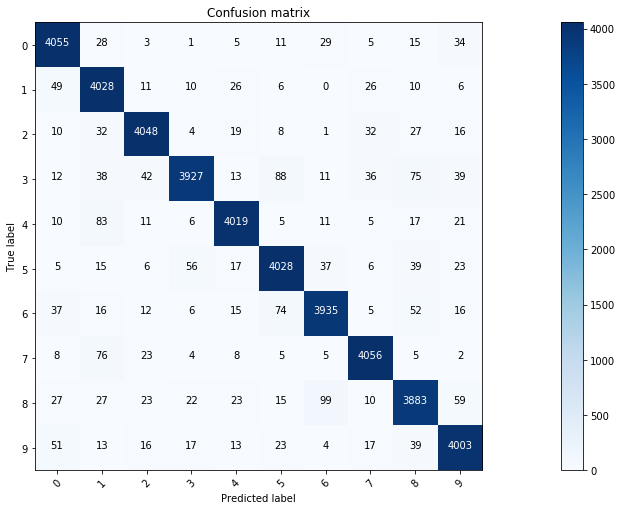

In [36]:
#Confusion Matrix Trainn Data with model1 
from sklearn.metrics import confusion_matrix
import itertools
plt.subplots(figsize=(22,7)) #set the size of the plot 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = cnn1.predict(X_train)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_train_cat,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

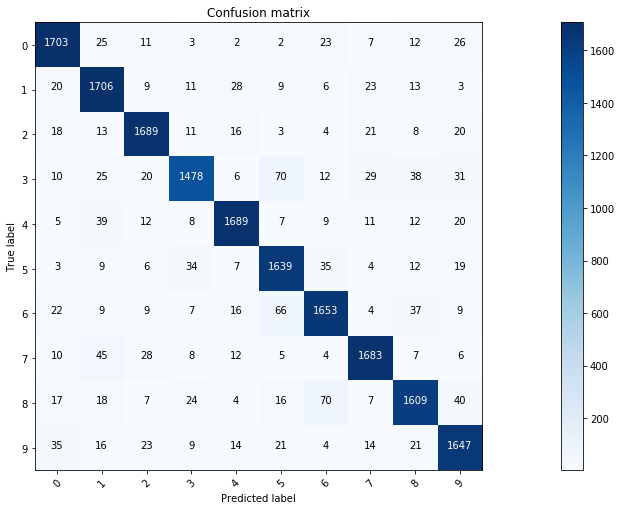

In [38]:
#Confusion Matrix Test Data with model1 
plt.subplots(figsize=(22,7)) #set the size of the plot 
# Predict the values from the validation dataset
Y_pred = cnn1.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test_cat,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

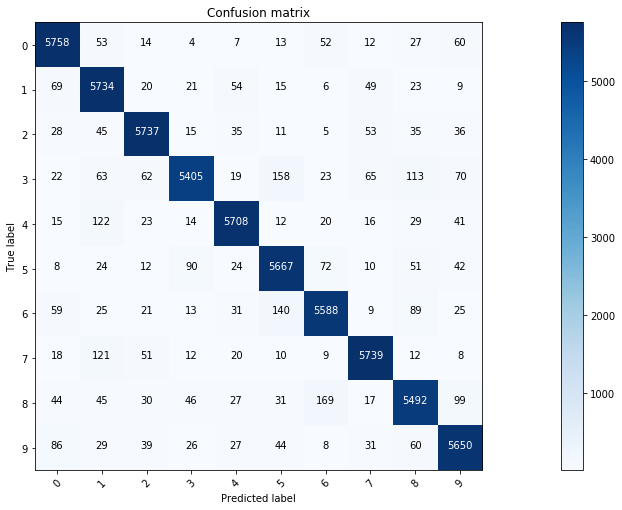

In [39]:
#Confusion Matrix Validation Data with model1 
plt.subplots(figsize=(22,7)) #set the size of the plot 
# Predict the values from the validation dataset
Y_pred = cnn1.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val_cat,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

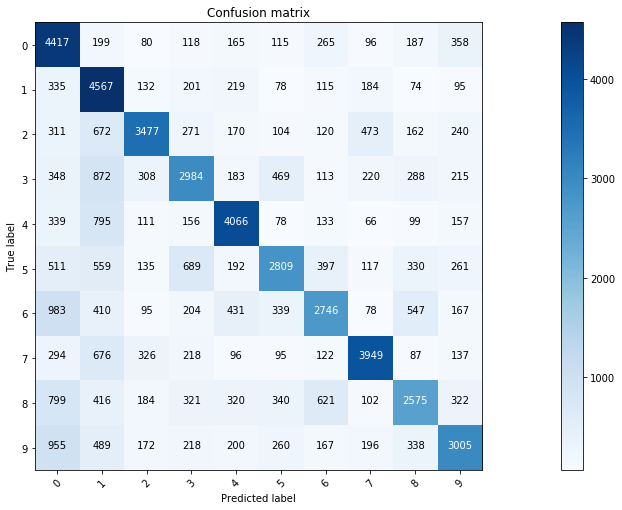

In [40]:
#Confusion Matrix Validation Data with KNN Model 
plt.subplots(figsize=(22,7)) #set the size of the plot 
# Predict the values from the validation dataset
Y_pred = NNH.predict(rawImages_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = Y_pred 
# Convert validation observations to one hot vectors
Y_true = y_val 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))